<a href="https://colab.research.google.com/github/oneway-net/scientific-python/blob/main/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lecture 2
This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy

# Classes (Basic Section Start)

Classes let you abstract away details while programming.

In [ ]:
2 + 3

5

In [ ]:
"2" + "3"

'23'

In [ ]:
[1] + [2, 3] # a.extend(b)

[1, 2, 3]

In [ ]:
x = []
x.append(2) 
x

[2]

In [ ]:
type(x)

list

In [ ]:
x = []
list.append(x,2) 
x

[2]

In [ ]:
from typing_extensions import Self
class Animal:
    # constructor __init__
    def __init__(self, sound):
        self.sound = sound
        print(f"An Animal class is created")
    # method
    def make_sound(self):
        print(f"Sound: {self.sound}")

Python use `self` parameter to refer to instance attributes and methods of the class
- If an instance called its class method, the method will treat the first arguments as the reference to the instance
  - `instance.method(args) = class.method(instance,args)`
- `self` refers to the instance of the class (python norm)



In [ ]:
cat = Animal('Meow')
dog = Animal('Bark')

An Animal class is created
An Animal class is created


In [ ]:
type(cat), type(dog)

(__main__.Animal, __main__.Animal)

In [ ]:
print("instance.method(args):\n")
cat.make_sound()
# dog.make_sound()

#instance.method(args) = class.method(instance,args)

print("\n\nclass.method(instance,args):\n")
Animal.make_sound(cat)
# Animal.make_sound(dog)

instance.method(args):

Sound: Meow


class.method(instance,args):

Sound: Meow


In [ ]:
# list class
x = []
print(type(x))
x.append(1) #something like: 
x

<class 'list'>


[1]

In [ ]:
# instance.method(args) = class.method(instance,args)
'''
class list:
  def __init__(self, ...):
      ...
  def append(self, args):
      ...
'''

x = []
list.append(x, 1) 
x

# self argument equals to x
# self is the thing goes to the front of arguments
# can be replaced with anything, but it’s like a explicit rule in python

[1]

## Bank Account example to illustrate Classes and Objects

In [ ]:
debits = []
credits = []

In [ ]:
def add_to_debits(debits_list, value):
    debits_list.append(value)

In [ ]:
def add_to_credits(credits_list, value):
    credits_list.append(value)

In [ ]:
add_to_debits(debits,10)
add_to_debits(debits,15)
add_to_debits(debits,100)

add_to_credits(credits, 100)

In [ ]:
debits

[10, 15, 100]

In [ ]:
credits

[100]

In [ ]:
def total_value(debits, credits):
    total =0 
    for val in debits:
        total+=val
    for val in credits:
        total-=val
    return total

In [ ]:
total_value(debits, credits)

25

## Lets use Classes and Objects

#### 1. Initialize a class

In [ ]:
class Account:
    def __init__(self):
      self.debits = []
      self.credits = []

In [ ]:
a1 = Account()
print(a1.debits)
print(a1.credits)

[]
[]


In [ ]:
a2 = Account()
print(a2.debits)
print(a2.credits)

[]
[]


#### 2. Add methods

In [ ]:
class Account:
    def __init__(self):
      self.debits = []
      self.credits = []

    def add_to_credits(self, value):
      self.credits.append(value)

    def add_to_debits(self, value):
      self.debits.append(value)

    def total_value(self):
      total = 0 
      total += sum(self.debits)
      total -= sum(self.credits)
      return total

In [ ]:
a1 = Account()
a2 = Account()

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}\n")

a1.add_to_credits(10)

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}")

a1.credits:[]
a2.credits:[]

a1.credits:[10]
a2.credits:[]


In [ ]:
a1.add_to_debits(40)
a2.add_to_debits(10)

print(f"a1.debits:{a1.debits}")
print(f"a2.debits:{a2.debits}")

a1.debits:[40]
a2.debits:[10]


In [ ]:
print(f"a1 total value:{a1.total_value()}")
print(f"a1 total value:{a2.total_value()}")

a1 total value:30
a1 total value:10


## (Basic Section End)

## Exercise 1 (Post Lecture)

### Add more functionality to the account class

1. Add a check before debits to ensure funds are available

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

In [ ]:
# # Solution:
# accounts = []
# class Account:
#     def __init__(s):
#         global accounts
#         s.debits = []
#         s.credits = []
#         accounts += [s]
        
#     def add_to_debits(self,value):
#         self.debits += [value]

#     def add_to_credits(self,value):
#         if value < self.total_value():
#           self.credits += [value]
#           return True
#         else:
#           print("Insufficient funds")
#           return False

#     def total_value(self):
#         total =0 
#         for val in self.debits:
#             total+=val
#         for val in self.credits:
#             total-=val
#         return total

#     def transfer(self, other, value): #other is another instance of Account object
#       if value > 0:
#         if self.add_to_credits(value):
#           other.add_to_debits(value)

## Example: Rational Numbers

Here we'l make a class that holds rational numbers (fractions).  That is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers

In [ ]:
import math
class Rational:
    def __init__(self, p, q=1):
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = math.gcd(p, q)
        
        self.p = p // g # integer division
        self.q = q // g
  
    
    # method to convert rational to string for printing
    def __str__(self):
        return f'{self.p}/{self.q}, I am a rational number :-)'
    
    def __repr__(self): #printable representation
        return f'Rational({self.p}, {self.q}) :-('

    # method to convert rational to float
    def __float__(self):
        return self.p / self.q


In [ ]:
a = Rational(6, 4)
b = Rational(3, 2)

print(type(a))
print(f"a = {a}")
print(f"b = {b}")
print([a,b])
print(f"float(a) = {float(a)}")

<class '__main__.Rational'>
a = 3/2, I am a rational number :-)
b = 3/2, I am a rational number :-)
[Rational(3, 2) :-(, Rational(3, 2) :-(]
float(a) = 1.5


In [ ]:
a + b

# We need Magic Method!! 

TypeError: ignored

## Plus Operation: `__add__`


In [ ]:
a = 2
b = 3
# a + b # equivalent a.extend(b)

#instance.method(args) = class.method(instance,args)
print(a.__add__(b))
print(int.__add__(a,b))

5
5


In [ ]:
# For example:
a = [1,2]
b = [3,4]
# a + b # equivalent a.extend(b)
print(a.__add__(b))
print(list.__add__(a,b))

[1, 2, 3, 4]
[1, 2, 3, 4]


## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [ ]:
import math

class Rational:
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')
        
        g = math.gcd(p, q)
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other):
        #Return whether an object is an instance of a class or of a subclass thereof.
        if isinstance(other, Rational): 
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
       return self + other # addition commutes!
    

In [ ]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [ ]:
r3 = r1 + r2
print( type(r3) )
print( r3 )
print( float( r3 ))

<class '__main__.Rational'>
13 / 4
3.25


In [ ]:
 #left add
print( r1 + 3 )

#Rational.__add__(self, other)

15 / 4


In [ ]:
#right add
print( 3 + r1 )

# (3).__add__(r1) if failed
# r1.__radd__(3)

15 / 4


# Exercise 2 (Post-Lecture)
More about magic method: Magic Method : https://python-course.eu/oop/magic-methods.php
### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__`
* `/` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.



In [ ]:
# Solution
class Rational:
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')
        
        g = math.gcd(p, q)
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!
    
    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return self + Rational(-other.p,other.q)
        elif isinstance(other, int):
            return self + (-other)
    
    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.p,self.q*other.q)
        elif isinstance(other, int):
            return Rational(self.p*other,self.q)
        
    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.q,self.q*other.p)
        elif isinstance(other, int):
            return Rational(self.p,self.q*other)
        
    def __repr__(self):
        return self.__str__()
    
    def __rmul__(self, other):
        return self*other;
    

In [ ]:
# Write some examples to test your code

In [ ]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

In [ ]:
r1

In [ ]:
r1*r2

In [ ]:
r1-r2

In [ ]:
r1/r2

# Exercise 3 [Post Lecture]
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

In [ ]:
def babylonian(S, num_iters=5):
    # TODO: Delete the raise error when implemented
    raise NotImplementedError('Not implemented yet')





   
    
    # # Solution
    # x = S/2
    # for i in range(num_iters):
    #   x = (x + S/x)/2
    # return x

In [ ]:
math.sqrt(24)

In [ ]:
babylonian(24)

In [ ]:
babylonian(Rational(24))

# NumPy
This is a good segue into NumPy. Python provides only a handful of numeric types: ints, longs, floats, and complex numbers. We just declared a class that implements rational numbers. NumPy implements one very useful numeric type: multidimensional arrays.

In [ ]:
# Quick note on importing
import math
math.sin(5)

-0.9589242746631385

In [ ]:
import math as m
m.sin(5)

-0.9589242746631385

In [ ]:
import numpy as np

In [ ]:
?np.array

In [ ]:
print([[0, 2], [1, 5]]) 

[[0, 2], [1, 5]]


In [ ]:
x = np.array([[0, 2], [1, 5]])
print(type(x))
x

<class 'numpy.ndarray'>


array([[0, 2],
       [1, 5]])

In [ ]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [ ]:
x + y

array([[4, 2],
       [1, 9]])

In [ ]:
x ** 2

array([[ 0,  4],
       [ 1, 25]])

In [ ]:
x * y  # Elementarywise multiplication

In [ ]:
x

array([[0, 2],
       [1, 5]])

In [ ]:
y

array([[4, 0],
       [0, 4]])

In [ ]:
x @ y  # Matrix multiplication after Python 3.5, traditional way: np.matmul()

array([[ 0,  8],
       [ 4, 20]])

In [ ]:
np.dot(x,y)

array([[ 0,  8],
       [ 4, 20]])

In [ ]:
np.matmul(x,y)

array([[ 0,  8],
       [ 4, 20]])

In [ ]:
np.sum(x) # More method in the next lecture

8

### Why NumPy?
1. numpy optimize operation for numeric data
2. processes the tasks parallelly.
3. The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.

In [ ]:
%%timeit
x = list(np.random.rand(10000))
y = list(np.random.rand(10000))
z=0
for i in range(10000):
    z += x[i]*y[i]

3.3 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
np.dot()

In [ ]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = np.dot(x,y)

309 µs ± 90.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## NumPy functions for creating arrays

In [ ]:
?np.zeros

In [ ]:
X=np.zeros(shape = (5,10))
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X[1,2] = 1
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X.shape

(5, 10)

In [ ]:
Y=np.ones(shape = (5,10))
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
?np.twos

Object `np.twos` not found.


In [ ]:
2*Y + 3

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [ ]:
?np.random.rand

In [ ]:
R=np.random.rand(5,5)
R

array([[0.8972149 , 0.35192845, 0.8079397 , 0.22234728, 0.2449166 ],
       [0.50358914, 0.02860793, 0.86036864, 0.22517401, 0.12629951],
       [0.42570359, 0.1930573 , 0.45103045, 0.21347197, 0.30886832],
       [0.11405467, 0.01420315, 0.95214465, 0.75467029, 0.55588054],
       [0.08638947, 0.78957243, 0.1775384 , 0.58390338, 0.22139762]])

In [ ]:
Rn = np.random.randn(5,5) #each number is a standard random normal variable (“standard normal” distribution) 
Rn

array([[-0.89009882, -0.27553482,  0.04212567, -0.2153849 , -1.20187084],
       [-0.84649521, -0.26178666, -0.43103892,  0.53534676, -0.41825873],
       [-1.09539663, -0.30005173,  0.66274682,  1.93539336,  0.70515496],
       [ 0.36596416, -0.9708719 ,  0.48928086, -1.63210199,  0.80976057],
       [-0.09708912, -0.50675253,  1.44559597, -1.20388627, -1.2853747 ]])

In [ ]:
np.arange(1,100,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
x = []
for i in range(1,100,2):
  x.append(i)
print(x)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [ ]:
np.linspace(1,99,50) #end value is inclusive! 

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81., 83., 85., 87., 89., 91., 93., 95., 97., 99.])

In [ ]:
np.linspace(0,5,11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
X = np.arange(0,48)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [ ]:
X.reshape((6,8)) #(20, -1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [ ]:
X.reshape((8,-1)) #(20, -1)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

In [ ]:
x = np.arange(50, 51, 0.01)

In [ ]:
x.reshape(10, -1)

In [ ]:
np.linspace(0, 10, 11)

In [ ]:
np.linspace(50, 51, 101)

# Plotting (Optional)

We will see some functions to do some quick plotting, we will come back to this library later.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
#matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB

In [ ]:
x = np.linspace(-5,5,100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [ ]:
y = x*x
y

array([2.50000000e+01, 2.40001020e+01, 2.30206101e+01, 2.20615243e+01,
       2.11228446e+01, 2.02045710e+01, 1.93067034e+01, 1.84292419e+01,
       1.75721865e+01, 1.67355372e+01, 1.59192939e+01, 1.51234568e+01,
       1.43480257e+01, 1.35930007e+01, 1.28583818e+01, 1.21441690e+01,
       1.14503622e+01, 1.07769615e+01, 1.01239669e+01, 9.49137843e+00,
       8.87919600e+00, 8.28741965e+00, 7.71604938e+00, 7.16508520e+00,
       6.63452709e+00, 6.12437506e+00, 5.63462912e+00, 5.16528926e+00,
       4.71635547e+00, 4.28782777e+00, 3.87970615e+00, 3.49199061e+00,
       3.12468115e+00, 2.77777778e+00, 2.45128048e+00, 2.14518927e+00,
       1.85950413e+00, 1.59422508e+00, 1.34935211e+00, 1.12488522e+00,
       9.20824406e-01, 7.37169677e-01, 5.73921028e-01, 4.31078461e-01,
       3.08641975e-01, 2.06611570e-01, 1.24987246e-01, 6.37690032e-02,
       2.29568411e-02, 2.55076013e-03, 2.55076013e-03, 2.29568411e-02,
       6.37690032e-02, 1.24987246e-01, 2.06611570e-01, 3.08641975e-01,
      

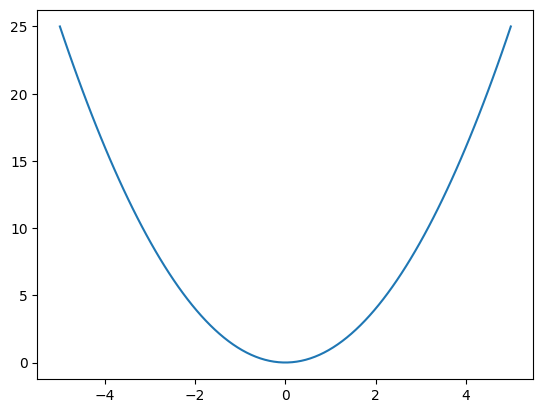

In [ ]:
plt.plot(x,y)

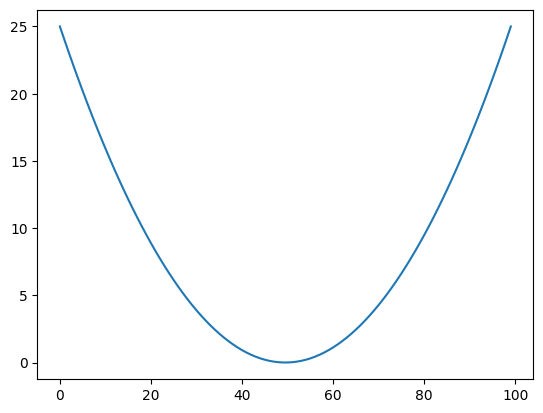

In [ ]:
plt.plot(y)

In [ ]:
?plt.plot

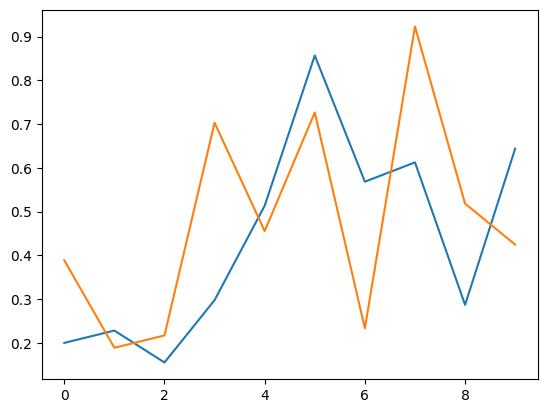

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Text(0.5, 1.0, 'Title')

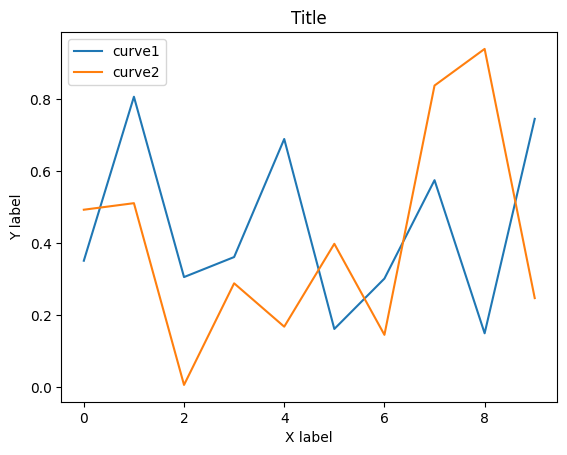

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1","curve2"])
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Title")

Matplotlib Gallery: https://matplotlib.org/stable/plot_types/index

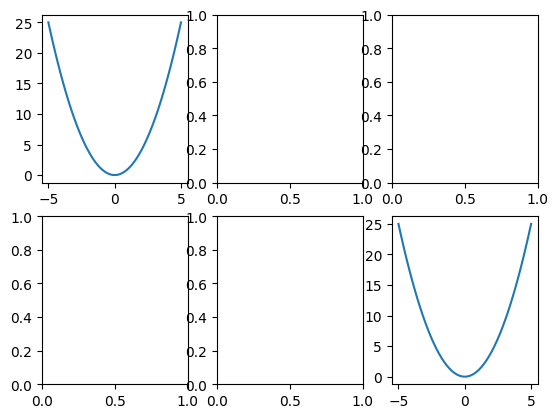

In [ ]:
#(Optional)
# Multiple Subplots 
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].plot(x,y)
ax[1,2].plot(x,y)